# How can I make the best game?

## Introduction

# Data Curation

Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scst
import matplotlib.pyplot as plt
from math import ceil

C:\Users\caintpet\AppData\Local\Temp\ipykernel_37568\2086570571.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Reading the dataset into a dataframe. Dataset can be found at the following link: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset

In [2]:
df = pd.read_csv("games.csv")
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Outputting some basic information about shape of the dataframe:

In [3]:
print(f"Column names: {list(df.columns)}.")
print(f"Dimensions: {df.shape[0]} rows and {df.shape[1]} columns.")
print("Data types:===============================================" + 
      f"\n{df.dtypes}\n" + 
      "==========================================================")

Column names: ['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age', 'Price', 'DLC count', 'About the game', 'Supported languages', 'Full audio languages', 'Reviews', 'Header image', 'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score', 'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations', 'Notes', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'].
Dimensions: 85103 rows and 39 columns.
Data types:===============================================
AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count             

## Cleaning and modifying the data set

Converting release date column to datetimes:

In [4]:
def sanitize_dates(date:str):
    split_date = date.split(",")
    # If there's no comma in the date, assume no release day is specified; default to 1st of the month
    if len(split_date) == 1:
        split_date = date.split(" ")
        return f"{split_date[0]} 1, {split_date[1]}"
    else:
        return date

df["Release date"] = df["Release date"].apply(sanitize_dates)
df["Release date"] = pd.to_datetime(df["Release date"], format="%b %d, %Y")

In [5]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


### Removing Columns
The following columns will be removed; they are used for storefront purposes and will not help our data analysis:
"About the game", "Support url", "Support email", "Metacritic url", "Notes", "Screenshots", "Movies"

In [6]:
df = df.drop(["About the game", "Support url", "Support email", "Metacritic url", "Notes", "Screenshots", "Movies"], axis=1)

In [7]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Supported languages,Full audio languages,...,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,['English'],[],...,0,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,"['English', 'Portuguese - Brazil']",[],...,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,"['English', 'Spanish - Spain']",[],...,0,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


In [8]:
df1 = df[df["Metacritic score"] != 0]
df1.shape

(3912, 32)

### Adding and Modifying Features
Let's add columns for the total number of ratings and the percentage of ratings that are positive.

In [9]:
df["Total Ratings"] = df["Positive"] + df["Negative"]
df["Percent Positive Ratings"] = (df["Positive"] / df["Total Ratings"]) * 100.0
df

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Supported languages,Full audio languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Total Ratings,Percent Positive Ratings
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,0,19.99,0,['English'],[],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",17,35.294118
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",58,91.379310
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,0,4.99,0,"['English', 'Portuguese - Brazil']",[],...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,0,NaN
3,1355720,Henosis™,2020-07-23,0 - 20000,0,0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",3,100.000000
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,0,"['English', 'Spanish - Spain']",[],...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",58,86.206897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85098,2669080,Mannerheim's Saloon Car,2024-01-02,0 - 0,0,0,0.00,0,"['English', 'Finnish']",['Finnish'],...,0,0,0,Xamk Game Studios,"Sodan ja rauhan keskus Muisti, Päämajamuseo","Single-player,Tracked Controller Support,VR Only","Adventure,Simulation",NaN,0,NaN
85099,2736910,Beer Run,2024-01-03,0 - 0,0,0,0.00,0,['English'],[],...,0,0,0,955 Games,955 Games,Single-player,"Casual,Indie",NaN,0,NaN
85100,2743220,My Friend The Spider,2024-01-04,0 - 0,0,0,0.00,0,['English'],['English'],...,0,0,0,MCA,MCA,Single-player,"Adventure,Simulation",NaN,0,NaN
85101,2293130,Path of Survivors,2024-01-08,0 - 0,0,0,3.99,0,['English'],[],...,0,0,0,Limited Input,Limited Input,"Single-player,Steam Achievements,Partial Contr...","Action,Casual,Indie,RPG,Simulation",NaN,0,NaN


The Categories, Genres, and Tags columns have values that are long, comma-separated lists of string values. Currently, they're read as a single long string. For ease of access, let's separate the Categories, Genres, and Tags columns' values into lists.

In [10]:
def simple_split(string, delim:str):
    if pd.isna(string):
        return pd.NA
    else:
        return string.split(delim)

df["Categories"] = df["Categories"].apply(simple_split, args=(","))
df["Genres"] = df["Genres"].apply(simple_split, args=(","))
df["Tags"] = df["Tags"].apply(simple_split, args=(","))

Let's also have Single-player and Multi-player columns, which should be "1" if the game has "Single-player" and/or "Multi-player" in its "Categories" entry, respectively. This is similar to a One-Hot Encoding, but note that we'll have to do this somewhat manually, since the entries in "Categories" are lists.

In [11]:
def in_list_elt(x, match=""):
    if np.any(pd.isna(x)):
        return 0
    elif (match in x):
        return 1
    else:
        return 0

df["Single-player"] = df["Categories"].apply(lambda x: in_list_elt(x, match="Single-player"))
df["Multi-player"] = df["Categories"].apply(lambda x: in_list_elt(x, match="Multi-player"))

Mean of Metacritic scores: 72.84151329243353
Standard Deviation of Metacritic scores: 10.565931103659011
Percent within one standard deviation of mean: 0.7188139059304703
Percent within two standard deviations of mean: 0.9552658486707567
Percent within three standard deviations of mean: 0.9882413087934561


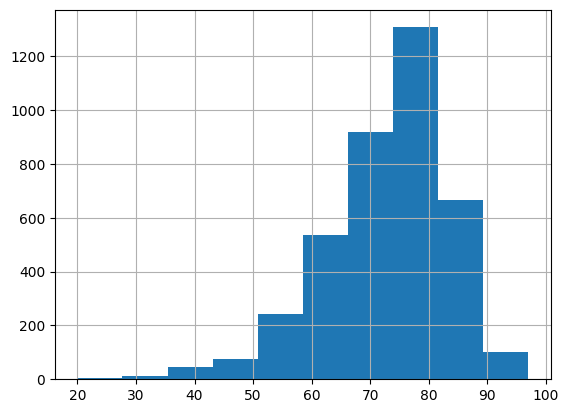

In [12]:
df = df[df["Metacritic score"] > 0]
df["Metacritic score"].hist()
ms_mean = df["Metacritic score"].mean()
ms_stdev = df["Metacritic score"].std()
print(f"Mean of Metacritic scores: {ms_mean}")
print(f"Standard Deviation of Metacritic scores: {ms_stdev}")
perc_1_stdev = len(df[(df["Metacritic score"] < (ms_mean + ms_stdev)) & (df["Metacritic score"] > (ms_mean - ms_stdev))]) / len(df)
print(f"Percent within one standard deviation of mean: {perc_1_stdev}")
perc_2_stdev = len(df[(df["Metacritic score"] < (ms_mean + (2*ms_stdev))) & (df["Metacritic score"] > (ms_mean - (2*ms_stdev)))]) / len(df)
print(f"Percent within two standard deviations of mean: {perc_2_stdev}")
perc_3_stdev = len(df[(df["Metacritic score"] < (ms_mean + (3*ms_stdev))) & (df["Metacritic score"] > (ms_mean - (3*ms_stdev)))]) / len(df)
print(f"Percent within three standard deviations of mean: {perc_3_stdev}")

As you can see, this is very close to a normal distribution, so it should be safe to assume that Metacritic scores are normally distributed. It's worth noting, though, that it is left-skewed, which may affect later data analysis.

## What should the game be about?

In [13]:
df_tags = df.explode("Tags")
print(df_tags.shape)
df_tags.dropna(subset = ["Tags"], inplace=True)
print(df_tags.shape)

(60546, 36)
(60520, 36)


In [14]:
all_tags = list(pd.unique(df_tags["Tags"]))
tag_groups = [list(df_tags["Metacritic score"][df_tags["Tags"] == tag]) for tag in all_tags]
scst.f_oneway(*tag_groups).pvalue

1.1510041421264897e-121

In [15]:
top_tags = df_tags[["Tags", "Metacritic score"]].groupby(["Tags"]).mean()
top20 = (top_tags.sort_values(by=["Metacritic score"], ascending=False)).head(20)
top20

,Metacritic score
Tags,
Batman,91.000000
Rock Music,87.000000
Well-Written,85.750000
Baseball,85.250000
Electronic Music,82.750000
Masterpiece,82.526316
Addictive,81.072727
Silent Protagonist,80.666667
Archery,80.250000


Wow. Truly, Batman always wins.

## Singleplayer or Multiplayer (or both)?

In [16]:
mult_df = df[(df["Multi-player"] == 1) & (df["Single-player"] == 0)]
sing_df = df[(df["Single-player"] == 1) & (df["Multi-player"] == 0)]
singmult_df = df[(df["Single-player"] == 1) & (df["Multi-player"] == 1)]

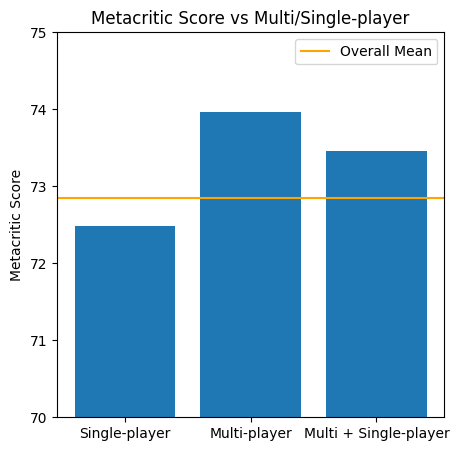

In [17]:
sing_scores = sing_df["Metacritic score"]
mult_scores = mult_df["Metacritic score"]
singmult_scores = singmult_df["Metacritic score"]
x_axis = ["Single-player", "Multi-player", "Multi + Single-player"]
y_axis = [sing_scores.mean(), mult_scores.mean(), singmult_scores.mean()]

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.bar(x_axis, y_axis)
axes.axhline(y=df["Metacritic score"].mean(), color='orange', linestyle='-', label="Overall Mean")
axes.set_title('Metacritic Score vs Multi/Single-player')
axes.set_ylim([70, 75])
axes.set_ylabel('Metacritic Score')
axes.legend()

Let's run an ANOVA test to see if there's a difference between these three groups.

In [18]:
sing_scores = sing_df["Metacritic score"]
mult_scores = mult_df["Metacritic score"]
singmult_scores = singmult_df["Metacritic score"]
scst.f_oneway(sing_scores, mult_scores, singmult_scores)

F_onewayResult(statistic=4.366351948711447, pvalue=0.012759607461070336)

So one of these groups has a statistically 

In [19]:
print(scst.tukey_hsd(sing_scores, mult_scores, singmult_scores))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.474     0.293    -3.784     0.835
 (0 - 2)     -0.980     0.018    -1.827    -0.134
 (1 - 0)      1.474     0.293    -0.835     3.784
 (1 - 2)      0.494     0.875    -1.864     2.852
 (2 - 0)      0.980     0.018     0.134     1.827
 (2 - 1)     -0.494     0.875    -2.852     1.864



## How many copies can I expect to sell?

In [20]:
pd.unique(df["Estimated owners"])

array(['20000 - 50000', '200000 - 500000', '100000 - 200000',
       '50000 - 100000', '500000 - 1000000', '2000000 - 5000000',
       '1000000 - 2000000', '0 - 20000', '20000000 - 50000000',
       '5000000 - 10000000', '0 - 0', '10000000 - 20000000',
       '50000000 - 100000000', '100000000 - 200000000'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '0 - 0'),
  Text(1, 0, '0 - 20000'),
  Text(2, 0, '20000 - 50000'),
  Text(3, 0, '50000 - 100000'),
  Text(4, 0, '100000 - 200000'),
  Text(5, 0, '200000 - 500000'),
  Text(6, 0, '500000 - 1000000'),
  Text(7, 0, '1000000 - 2000000'),
  Text(8, 0, '2000000 - 5000000'),
  Text(9, 0, '5000000 - 10000000'),
  Text(10, 0, '10000000 - 20000000'),
  Text(11, 0, '20000000 - 50000000'),
  Text(12, 0, '50000000 - 100000000'),
  Text(13, 0, '100000000 - 200000000')])

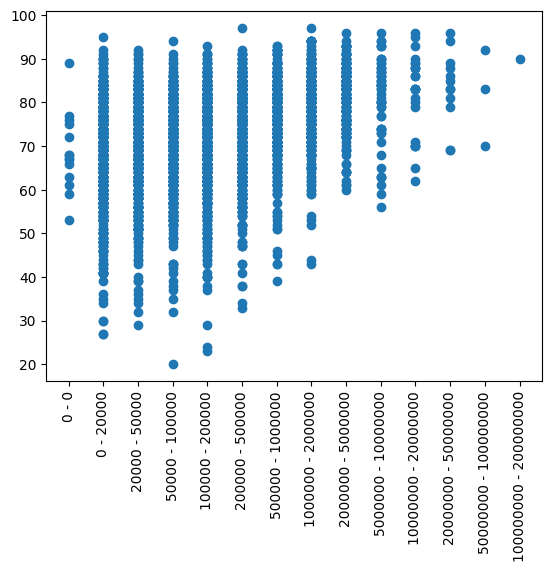

In [21]:
est_owners = ['0 - 0', '0 - 20000', '20000 - 50000', '50000 - 100000', '100000 - 200000','200000 - 500000', '500000 - 1000000', '1000000 - 2000000', '2000000 - 5000000', '5000000 - 10000000', '10000000 - 20000000', '20000000 - 50000000', '50000000 - 100000000', '100000000 - 200000000']
own_to_score = dict.fromkeys(est_owners)
for key in own_to_score.keys():
    own_to_score[key] = df["Metacritic score"][df["Estimated owners"] == key]

owners = []
o_scores = []

for key in own_to_score.keys():
    owners += [key for _ in range(len(own_to_score[key]))]
    o_scores += list(own_to_score[key])

plt.scatter(owners, o_scores)
plt.xticks(rotation=90)

We'll need to convert the estimated owner ranges to numbers to run linear regression. Let's choose the midpoint to represent each range:

In [22]:
range2num = dict.fromkeys(est_owners)
for key in range2num.keys():
    min = int(key.split(" - ")[0])
    max = int(key.split(" - ")[1])
    range2num[key] = int(min + ((max - min)/2))
print(range2num)
df["Estimated owners"] = df["Estimated owners"].apply(lambda x: range2num[x])
df

{'0 - 0': 0, '0 - 20000': 10000, '20000 - 50000': 35000, '50000 - 100000': 75000, '100000 - 200000': 150000, '200000 - 500000': 350000, '500000 - 1000000': 750000, '1000000 - 2000000': 1500000, '2000000 - 5000000': 3500000, '5000000 - 10000000': 7500000, '10000000 - 20000000': 15000000, '20000000 - 50000000': 35000000, '50000000 - 100000000': 75000000, '100000000 - 200000000': 150000000}


C:\Users\caintpet\AppData\Local\Temp\ipykernel_37568\2268234547.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Estimated owners"] = df["Estimated owners"].apply(lambda x: range2num[x])


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Supported languages,Full audio languages,...,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Total Ratings,Percent Positive Ratings,Single-player,Multi-player
10,1026420,WARSAW,2019-10-02,35000,5,0,23.99,0,"['English', 'French', 'German', 'Polish', 'Rus...",[],...,0,Pixelated Milk,"Pixelated Milk,gaming company","[Single-player, Steam Achievements, Steam Trad...","[Indie, RPG]","[Tactical RPG, Turn-Based Strategy, Wargame, H...",801,73.533084,1,0
15,22670,Alien Breed 3: Descent,2010-11-17,350000,3,0,9.99,0,"['English', 'French', 'German', 'Italian', 'Ja...",[],...,0,Team17 Digital Ltd,Team17 Digital Ltd,"[Single-player, Multi-player, Co-op, Steam Ach...",[Action],"[Action, Shooter, Sci-fi, Aliens, Third Person...",483,72.256729,1,1
42,231330,Deadfall Adventures,2013-11-15,150000,4,0,19.99,0,"['English', 'German', 'Polish', 'French', 'Rus...","['English', 'German', 'Russian']",...,0,The Farm 51,THQ Nordic,"[Single-player, Multi-player, Co-op, Steam Ach...","[Action, Adventure]","[Adventure, Action, FPS, Shooter, Multiplayer,...",2344,73.208191,1,1
44,897820,Reigns: Game of Thrones,2018-10-18,75000,2,0,3.99,0,"['English', 'French', 'German', 'Spanish - Spa...",[],...,0,Nerial,Devolver Digital,"[Single-player, Steam Achievements, Full contr...","[Adventure, Indie, RPG]","[RPG, Indie, Card Game, Adventure, Choices Mat...",901,77.469478,1,0
66,12140,Max Payne,2011-01-06,750000,49,17,3.49,0,['English'],['English'],...,79,Remedy Entertainment,Rockstar Games,[Single-player],[Action],"[Action, Noir, Classic, Third-Person Shooter, ...",10630,89.520226,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83304,1163060,The Making of Karateka,2023-08-29,10000,1,0,19.99,0,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Japanese']",...,0,Digital Eclipse,Digital Eclipse,"[Single-player, Steam Achievements, Full contr...",[Action],"[Action, 2D Fighter, 2D Platformer, Documentar...",57,98.245614,1,0
83349,1568970,Torn Away,2023-09-29,10000,3,0,14.99,1,"['English', 'French', 'German', 'Spanish - Spa...","['English', 'Russian', 'Turkish']",...,0,perelesoq,"perelesoq,Hawthorn Games","[Single-player, Steam Achievements, Full contr...","[Adventure, Indie]","[Story Rich, Female Protagonist, Atmospheric, ...",335,95.223881,1,0
83424,2140020,Stronghold: Definitive Edition,2023-11-07,350000,1894,0,14.99,0,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",...,496,FireFly Studios,FireFly Studios,"[Single-player, Multi-player, PvP, Online PvP,...","[Simulation, Strategy]","[City Builder, Real Time Tactics, Sandbox, Bui...",5215,87.516779,1,1
84088,1190970,House Flipper 2,2023-12-14,150000,14516,0,35.99,1,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Ukrainian']",...,0,"Frozen District,Empyrean","Frozen District,PlayWay S.A.","[Single-player, Steam Achievements, Full contr...","[Casual, Indie, Simulation]","[Simulation, Design & Illustration, Building, ...",1878,83.439830,1,0


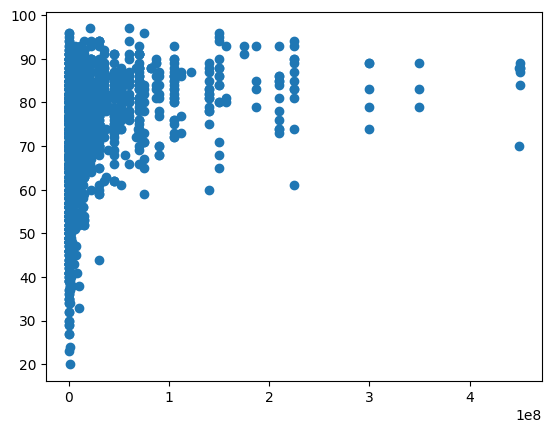

In [34]:
df["Estimated Revenue"] = df["Estimated owners"] * df["Price"]
df = df[df["Estimated Revenue"] < 0.5e9]
plt.scatter(df["Estimated Revenue"], df["Metacritic score"])
# plt.scatter(df["Metacritic score"], df["Estimated Revenue"])

In [23]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from collections import defaultdict

def try_models(X_raw, Y_raw, degree):
    X_train, X_test, Y_train, Y_test = train_test_split(X_raw, Y_raw)

    result = defaultdict(dict)
    for i in range(1, degree+1):
        poly = PolynomialFeatures(degree=i)

        model = make_pipeline(poly, ElasticNet(alpha=0.01))
        model.fit(X_train, Y_train)
        result[i]["Model"] = model

        Y_pred = model.predict(X_test)
        result[i]["Pred"] = Y_pred

        mse = mean_squared_error(Y_test, Y_pred)
        result[i]["Error"] = mse
    return X_train, X_test, Y_train, Y_test, result

Let's use the Elbow Method to determine the degree of our linear regression line.

c:\Users\caintpet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.495e+05, tolerance: 3.263e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\caintpet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.527e+05, tolerance: 3.263e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\caintpet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

Text(0, 0.5, 'Mean-Squared Error')

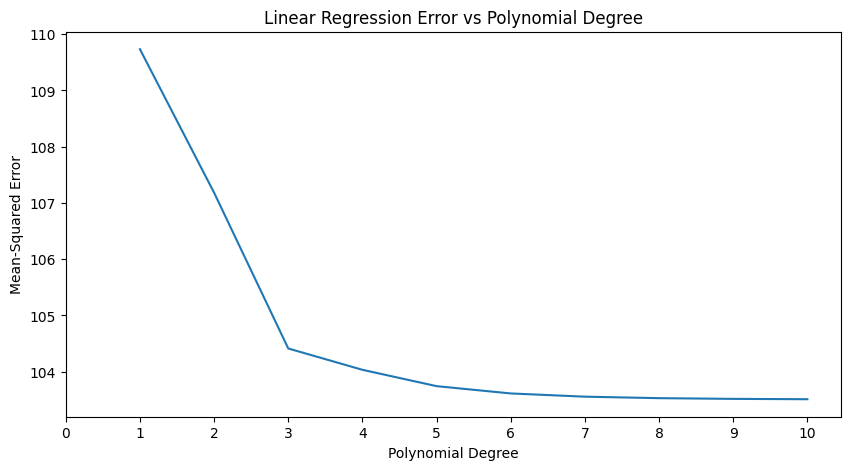

In [24]:
X_raw = df[["Estimated owners"]]
Y_raw = df[["Metacritic score"]]

max_degree = 10

X_train, X_test, Y_train, Y_test, models = try_models(X_raw, Y_raw, max_degree)

errors = [models[i]["Error"] for i in range(1, max_degree+1)]

fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.plot(range(1, max_degree+1), errors)
axes.set_title("Linear Regression Error vs Polynomial Degree")
axes.set_xlabel("Polynomial Degree")
axes.set_xticks(range(0, max_degree+1))
axes.set_ylabel("Mean-Squared Error")


It looks like we should choose degree 3. Now, let's plot the line:

c:\Users\caintpet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


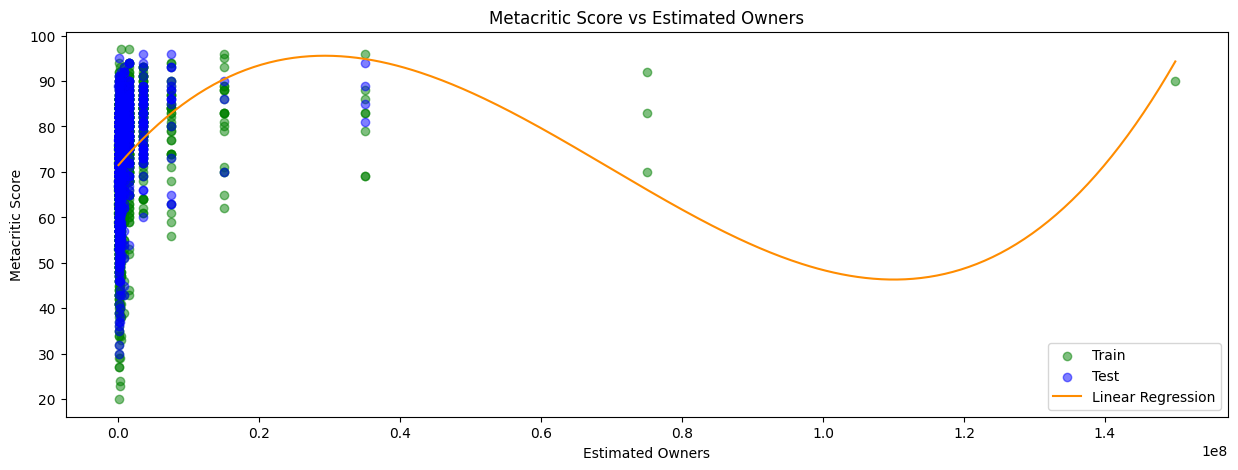

In [25]:
# Generate a dense grid for plotting purposes
X_dense = np.linspace(X_train.min(), X_train.max(), 400).reshape(-1, 1)

# Predict on the dense grid for smooth plotting
Y_dense_pred = (models[3]["Model"]).predict(X_dense)

# Formatting the plot
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
axes.scatter(X_train, Y_train, color='green', label='Train', alpha=0.5)
axes.scatter(X_test, Y_test, color='blue', label='Test', alpha=0.5)
axes.plot(X_dense, Y_dense_pred, color='darkorange', label='Linear Regression')
axes.set_title('Metacritic Score vs Estimated Owners')
axes.set_xlabel('Estimated Owners')
axes.set_ylabel('Metacritic Score')
axes.legend()

Oh no. Our lone datapoints in the "50000000 - 100000000" and "100000000 - 200000000" ranges are making our model 

c:\Users\caintpet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


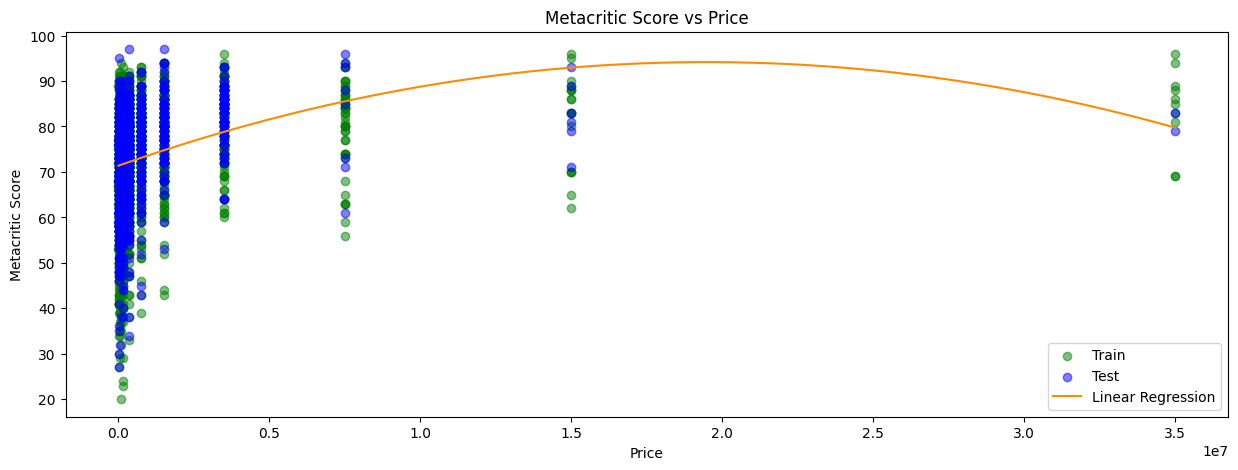

In [26]:
df = df[(df["Estimated owners"] != 150000000) & (df["Estimated owners"] !=  75000000)]

X_raw = df[["Estimated owners"]]
Y_raw = df[["Metacritic score"]]

X_train, X_test, Y_train, Y_test = train_test_split(X_raw, Y_raw)

poly = PolynomialFeatures(degree=2)

model = make_pipeline(poly, ElasticNet(alpha=0.01))
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)

# Generate a dense grid for plotting
X_dense = np.linspace(X_train.min(), X_train.max(), 400).reshape(-1, 1)

# Predict on the dense grid for smooth plotting
Y_dense_pred = model.predict(X_dense)

fig, axes = plt.subplots(1, 1, figsize=(15, 5))
axes.scatter(X_train, Y_train, color='green', label='Train', alpha=0.5)
axes.scatter(X_test, Y_test, color='blue', label='Test', alpha=0.5)
axes.plot(X_dense, Y_dense_pred, color='darkorange', label='Linear Regression')
axes.set_title('Metacritic Score vs Price')
axes.set_xlabel('Price')
axes.set_ylabel('Metacritic Score')
axes.legend()

## What should the price of the game be?

In [27]:
pr_ms_df = df[["Price", "Metacritic score"]]
pr_ms_df

,Price,Metacritic score
10,23.99,62
15,9.99,64
42,19.99,53
44,3.99,84
66,3.49,89
...,...,...
83304,19.99,90
83349,14.99,85
83424,14.99,82
84088,35.99,80


c:\Users\caintpet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.553e+05, tolerance: 3.257e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\caintpet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


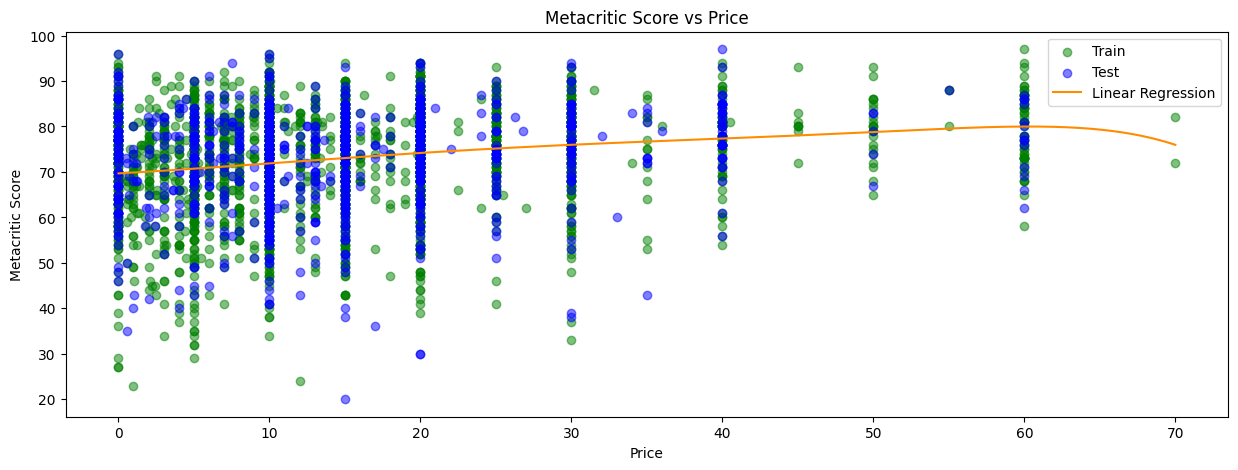

In [28]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

X_raw = pr_ms_df[["Price"]]
Y_raw = pr_ms_df[["Metacritic score"]]

X_train, X_test, Y_train, Y_test = train_test_split(X_raw, Y_raw)

poly = PolynomialFeatures(degree=10)

model = make_pipeline(poly, ElasticNet(alpha=0.01))
model.fit(X_train, Y_train)

# Generate a dense grid for plotting
X_dense = np.linspace(X_train.min(), X_train.max(), 400).reshape(-1, 1)

# Predict on the dense grid for smooth plotting
Y_dense_pred = model.predict(X_dense)

fig, axes = plt.subplots(1, 1, figsize=(15, 5))
axes.scatter(X_train, Y_train, color='green', label='Train', alpha=0.5)
axes.scatter(X_test, Y_test, color='blue', label='Test', alpha=0.5)
axes.plot(X_dense, Y_dense_pred, color='darkorange', label='Linear Regression')
axes.set_title('Metacritic Score vs Price')
axes.set_xlabel('Price')
axes.set_ylabel('Metacritic Score')
axes.legend()

In [29]:
scst.pearsonr(df["Price"], df["Metacritic score"])

PearsonRResult(statistic=0.20146664885771046, pvalue=4.514281010589343e-37)

# Insights and Conclusions